**Social Determinates of Health Geospacial Analysis**

In [435]:
import plotly.express as px
import pandas as pd
import os

In [437]:
# Loading Social Determinates of Health dataset
sdoh_data = pd.read_csv('sdoh.csv') 

In [438]:
sdoh_data.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,MOE,TotalPopulation,LocationID,CategoryID,MeasureID,DataValueTypeID,Short_Question_Text,Geolocation
0,2017-2021,ID,Idaho,Hauser,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.5,0.7,1015,1635830,SDOH,CROWD,Percent,Crowding,POINT (-117.008 47.7736943)
1,2017-2021,ID,Idaho,Weston,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,15.4,341,1687040,SDOH,CROWD,Percent,Crowding,POINT (-111.9777986 42.0362085)
2,2017-2021,IA,Iowa,Buckeye,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,33.7,112,1909100,SDOH,CROWD,Percent,Crowding,POINT (-93.3758252 42.4195334)
3,2017-2021,IA,Iowa,Carroll,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,0.5,10261,1911080,SDOH,CROWD,Percent,Crowding,POINT (-94.8646395 42.069835)
4,2017-2021,IA,Iowa,Conroy,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,17.0,158,1915870,SDOH,CROWD,Percent,Crowding,POINT (-91.9985284 41.7266134)


In [441]:
# Easy reference for Measures
# Get a list of unique measures
unique_measures = sdoh_data['Measure'].unique()
measures_list = unique_measures.tolist()
print(measures_list)

['Crowding among housing units', 'Single-parent households', 'Housing cost burden among households', 'Persons aged 65 years or older', 'No broadband internet subscription among households', 'Persons living below 150% of the poverty level', 'Persons of racial or ethnic minority status', 'No high school diploma among adults aged 25 years or older', 'Unemployment among people 16 years and older in the labor force']


In [443]:
# Filter the data for a specific measure, e.g., "Crowding among housing units"
filtered_data = sdoh_data[sdoh_data['Measure'] == 'Crowding among housing units']

In [445]:
# Aggregate the data by state to get the average measure per state
state_data = filtered_data.groupby('StateAbbr').agg(
    avg_crowding=('Data_Value', 'mean'),  # Taking the average value of "crowding"
    total_population=('TotalPopulation', 'sum')  # Summing total population
).reset_index()

In [447]:
fig = px.choropleth(state_data,
                    locations='StateAbbr',  # Location is the state abbreviation
                    locationmode='USA-states',  # Focus on USA states
                    color='avg_crowding',  # Color based on the average measure value
                    hover_name='StateAbbr',  # State abbreviation on hover
                    hover_data=['avg_crowding', 'total_population'],  # Show avg crowding and population
                    scope='usa',  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale for the map
                    labels={'avg_crowding':'Average Crowding (%)'},  # Label for the color legend
                    title='Average Crowding Among Housing Units by State',
                    width=1200,
                    height=800
                   )

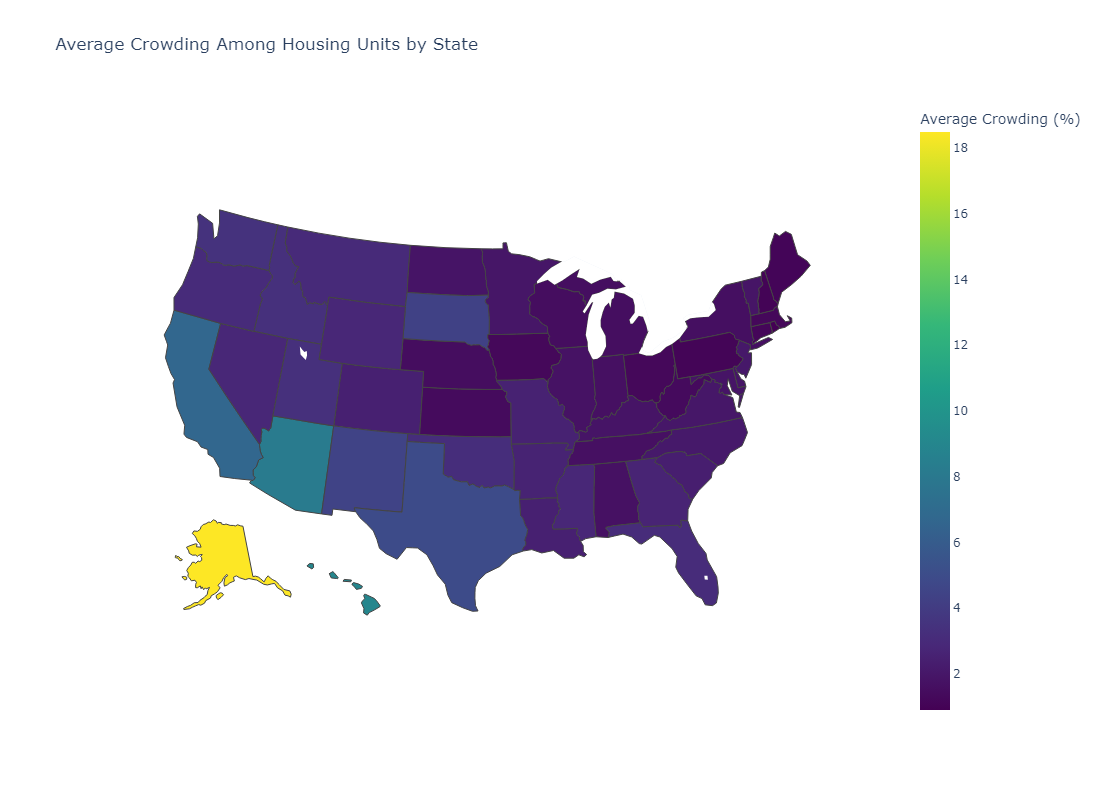

In [449]:
# Show the map
fig.show()

In [451]:
# Filter the data for a specific measure, e.g., "Persons aged 65 years or older"
filtered_data = sdoh_data[sdoh_data['Measure'] == 'Persons aged 65 years or older']

In [453]:
state_data = filtered_data.groupby('StateAbbr').agg(
    avg_aged65=('Data_Value', 'mean'),  # Taking the average value of "crowding"
    total_population=('TotalPopulation', 'sum')  # Summing total population
).reset_index()

In [455]:
fig = px.choropleth(state_data,
                    locations='StateAbbr',  # Location is the state abbreviation
                    locationmode='USA-states',  # Focus on USA states
                    color='avg_aged65',  # Color based on the average measure value
                    hover_name='StateAbbr',  # State abbreviation on hover
                    hover_data=['avg_aged65', 'total_population'],  # Show avg crowding and population
                    scope='usa',  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale for the map
                    labels={'avg_aged65':'Average Aged 65 or older (%)'},  # Label for the color legend
                    title='Average Aged 65 or Older by State',
                    width=1200,
                    height=800
                   )

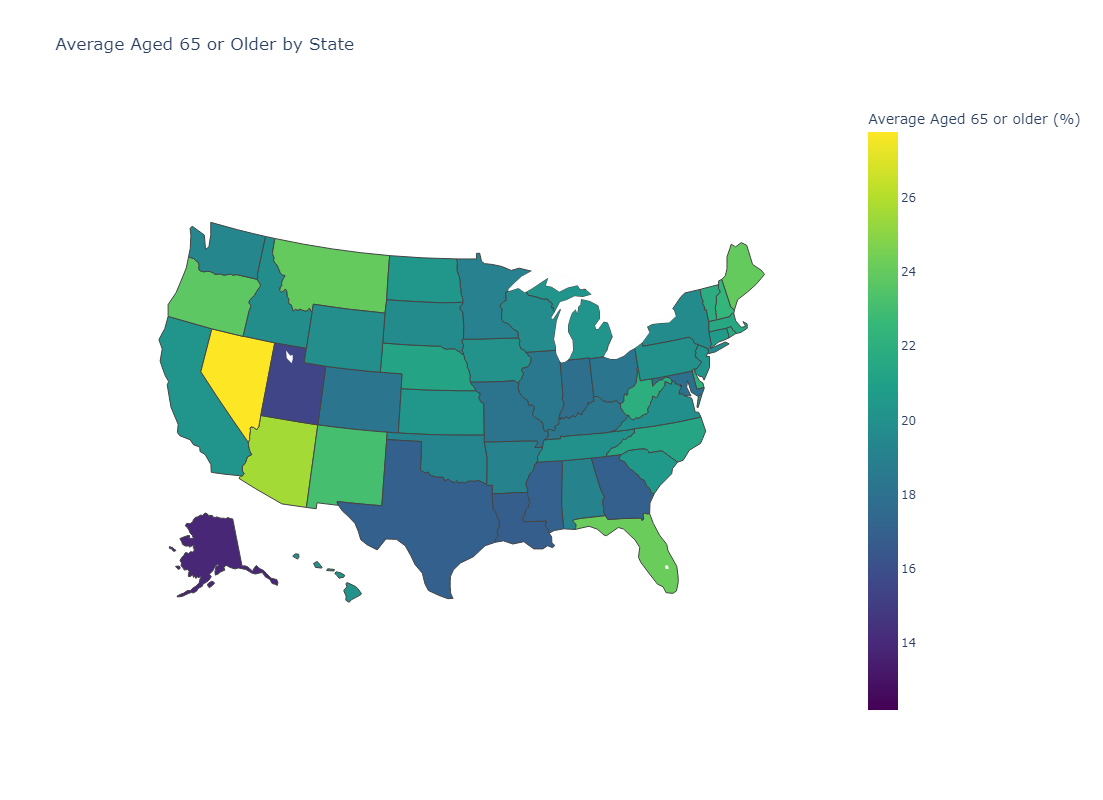

In [457]:
fig.show()

In [459]:
# Loading VA facilities data set
va_data = pd.read_csv('va_facilities.csv') 

In [461]:
va_data.head()

,station_id,division,name,region,type,address,city,state,latitude,longitude,postal_code,About this set
0,301,Veterans Benefits Administration,Boston VA Regional Office,Eastern Area Office,Benefits Office,"JFK Federal Building, 15 New Sudbury Street",Boston,MA,42.361778,-71.060064,2203,NaN
1,304,Veterans Benefits Administration,Providence Regional Office,Eastern Area Office,Benefits Office,380 Westminster Street,Providence,RI,41.821110,-71.414661,2903,NaN
2,306,Veterans Benefits Administration,New York Regional Office,Eastern Area Office,Benefits Office,245 W Houston St.,New York,NY,40.728584,-74.005220,10014,NaN
3,307,Veterans Benefits Administration,Buffalo Regional Office,Eastern Area Office,Benefits Office,130 S. Elmwood Avenue,Buffalo,NY,42.888878,-78.879005,14202,NaN
4,308,Veterans Benefits Administration,Hartford Regional Office,Eastern Area Office,Benefits Office,555 Willard Avenue,Newington,CT,41.701337,-72.740160,6111,NaN


In [463]:
# Easy reference for Type
unique_measures = va_data['type'].unique()
measures_list = unique_measures.tolist()
print(measures_list)

['Benefits Office', 'Cemetery', 'Hospital', 'Outpatient Clinic', 'VA Central Office', 'Vet Center', 'VISN Office']


In [465]:
# Filter VA facilities to include only Hospitals and Outpatient Clinics
va_medical = va_data[va_data['type'].isin(['Hospital', 'Outpatient Clinic'])]

In [467]:
# Group the VA facilities by state to get the count of facilities per state
va_count_by_state = va_medical.groupby('state').agg(
    num_facilities=('station_id', 'count')  # Count the number of facilities per state
).reset_index()
print(va_count_by_state.head())

  state  num_facilities
0    AK               5
1    AL              18
2    AR              17
3    AZ              24
4    CA              67


In [469]:
# Create the Choropleth map
fig = px.choropleth(va_count_by_state,
                    locations='state',  # Location is the state abbreviation
                    locationmode='USA-states',  # Focus on USA states
                    color='num_facilities',  # Color based on the number of facilities
                    hover_name='state',  # State abbreviation on hover
                    hover_data=['num_facilities'],  # Show the number of facilities
                    scope='usa',  # Focus the map on the USA
                    color_continuous_scale="Blues",  # Color scale for the map
                    labels={'num_facilities':'Number of VA Facilities'},  # Label for the color legend
                    title='Number of VA Facilities by State',
                    width=1200,
                    height=800
                   )

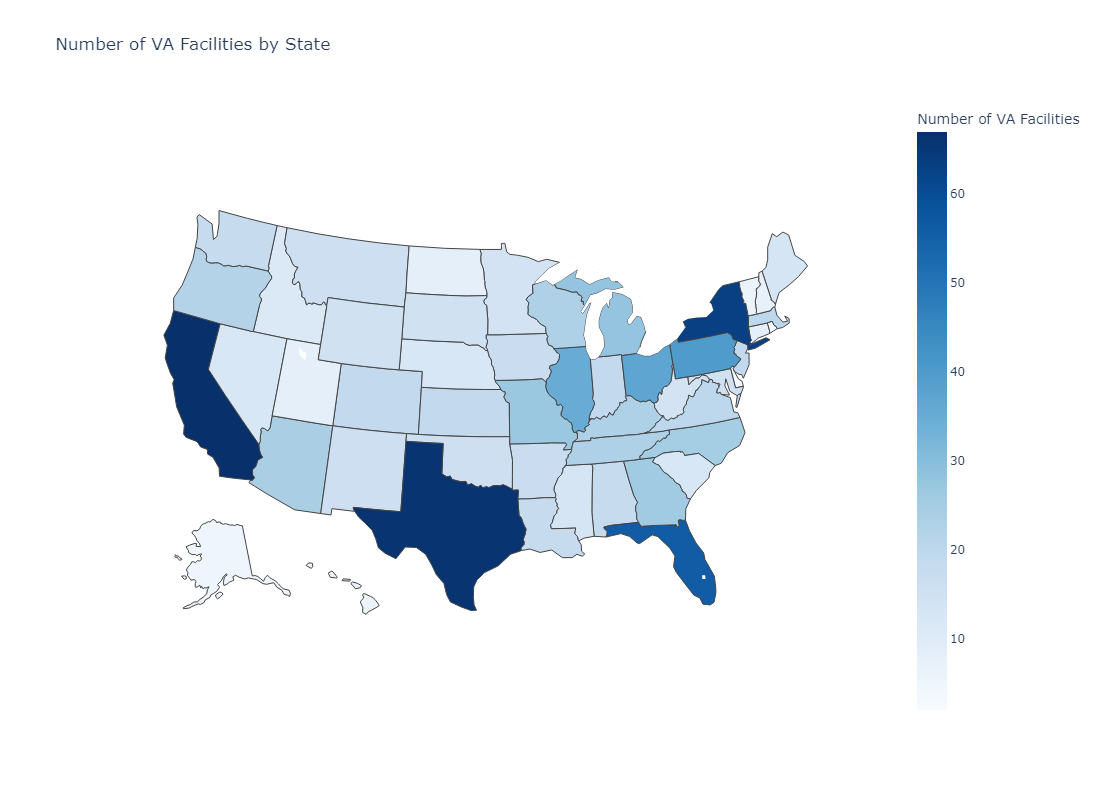

In [471]:
fig.show()

In [ ]:
**Comparing SDOH data and VA facility data**

In [474]:
print(va_count_by_state.head())

  state  num_facilities
0    AK               5
1    AL              18
2    AR              17
3    AZ              24
4    CA              67


In [476]:
print(state_data.head())

  StateAbbr  avg_aged65  total_population
0        AK   13.897842            719707
1        AL   19.159619           3333715
2        AR   19.172014           2101182
3        AZ   25.627725           6612018
4        CA   20.239182          37646499


In [478]:
# Merge VA facilities data with SDOH data by state abbreviation
combined_data = pd.merge(va_count_by_state, state_data, left_on='state', right_on='StateAbbr')
# Drop unnecessary columns after the merge
combined_data.drop(columns=['StateAbbr'], inplace=True)

print(combined_data.head())

  state  num_facilities  avg_aged65  total_population
0    AK               5   13.897842            719707
1    AL              18   19.159619           3333715
2    AR              17   19.172014           2101182
3    AZ              24   25.627725           6612018
4    CA              67   20.239182          37646499


In [480]:
# Filter VA facilities to include only Hospitals and Outpatient Clinics
va_filtered_df = va_data[va_data['type'].isin(['Hospital', 'Outpatient Clinic'])]

# Group by state and count hospitals and outpatient clinics separately
va_count_by_state = va_filtered_df.pivot_table(index='state', columns='type', aggfunc='size', fill_value=0).reset_index()

# Rename columns for clarity
va_count_by_state.rename(columns={'Hospital': 'num_hospitals', 'Outpatient Clinic': 'num_outpatient_clinics'}, inplace=True)

print(va_count_by_state.head())

type state  num_hospitals  num_outpatient_clinics
0       AK              1                       4
1       AL              4                      14
2       AR              2                      15
3       AZ              3                      21
4       CA              8                      59


In [482]:
# Merge VA facilities data with SDOH data by state abbreviation
combined_data = pd.merge(va_count_by_state, state_data, left_on='state', right_on='StateAbbr')

# Drop unnecessary columns after the merge
combined_data.drop(columns=['StateAbbr'], inplace=True)

print(combined_data.head())

  state  num_hospitals  num_outpatient_clinics  avg_aged65  total_population
0    AK              1                       4   13.897842            719707
1    AL              4                      14   19.159619           3333715
2    AR              2                      15   19.172014           2101182
3    AZ              3                      21   25.627725           6612018
4    CA              8                      59   20.239182          37646499


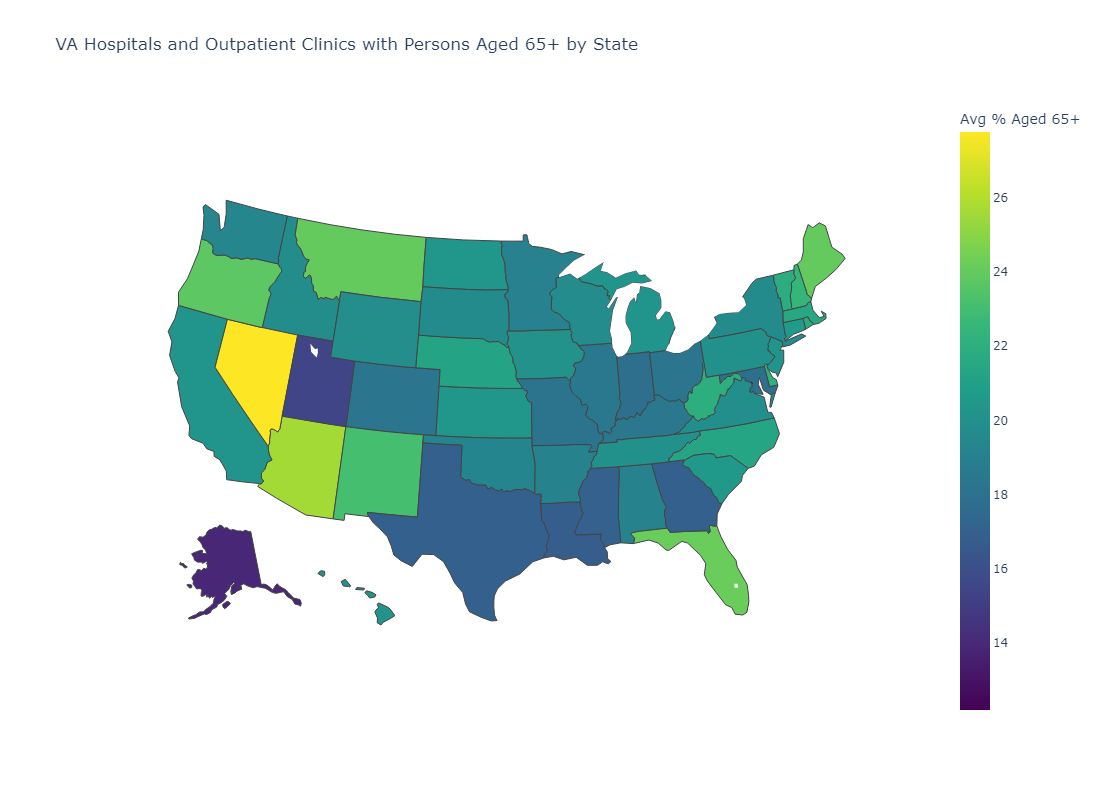

In [484]:
# Create the combined Choropleth map
fig = px.choropleth(combined_data,
                    locations='state',  # Use the state abbreviation
                    locationmode='USA-states',  # Focus on USA states
                    color='avg_aged65',  # Color based on average percentage of persons aged 65 or older
                    hover_name='state',  # State abbreviation on hover
                    hover_data={
                        'num_hospitals': True,  # Show number of hospitals
                        'num_outpatient_clinics': True,  # Show number of outpatient clinics
                        'avg_aged65': True,  # Show average percentage of persons aged 65+
                        'total_population': True  # Show total population (optional)
                    },
                    scope='usa',  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale for the map
                    labels={
                        'avg_aged65': 'Avg % Aged 65+',
                        'num_hospitals': 'Number of Hospitals',
                        'num_outpatient_clinics': 'Number of Outpatient Clinics'
                    },
                    title='VA Hospitals and Outpatient Clinics with Persons Aged 65+ by State',
                    width=1200,
                    height=800
                   )

# Show the map
fig.show()

In [485]:
# Let's look more into concentration of VA services for age 65+ population
# Ensure there are no zero values in 'num_facilities' to avoid division by zero
combined_data['total_facilities'] = combined_data['num_hospitals'] + combined_data['num_outpatient_clinics']
combined_data['facilities_per_65plus'] = combined_data['total_facilities'] / combined_data['avg_aged65']

# Alternatively, you can use the inverse to focus on states with more aged 65+ but fewer facilities:
combined_data['65plus_per_facility'] = combined_data['avg_aged65'] / combined_data['total_facilities']

# Check the result
print(combined_data[['state', 'avg_aged65', 'total_facilities', '65plus_per_facility']].head())


  state  avg_aged65  total_facilities  65plus_per_facility
0    AK   13.897842                 5             2.779568
1    AL   19.159619                18             1.064423
2    AR   19.172014                17             1.127766
3    AZ   25.627725                24             1.067822
4    CA   20.239182                67             0.302077


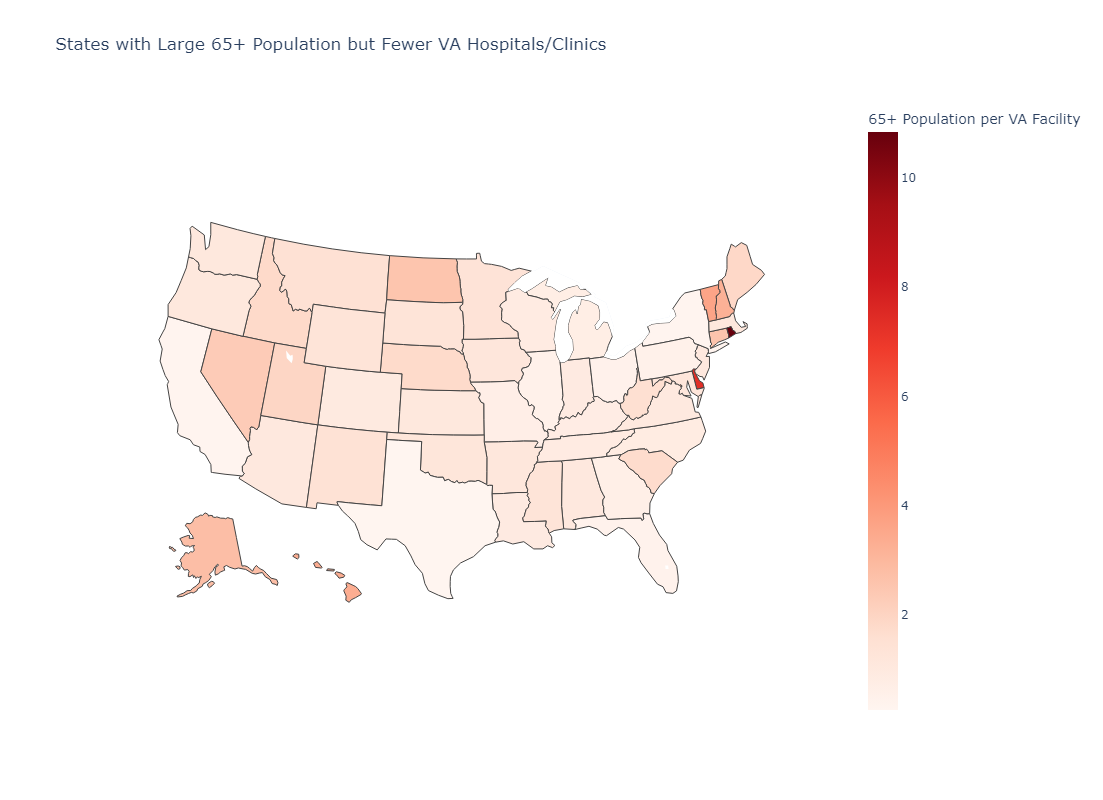

In [488]:
# Create a choropleth map to visualize states with large 65+ populations and fewer VA facilities
fig = px.choropleth(combined_data,
                    locations='state',  # State abbreviation
                    locationmode='USA-states',  # Focus on USA states
                    color='65plus_per_facility',  # Color based on the 65+ population per facility ratio
                    hover_name='state',  # State abbreviation on hover
                    hover_data={
                        'num_hospitals': True,  # Number of hospitals
                        'num_outpatient_clinics': True,  # Number of outpatient clinics
                        'avg_aged65': True,  # Average % of population aged 65+
                        'total_facilities': True,  # Total VA facilities
                        '65plus_per_facility': True  # The calculated ratio
                    },
                    scope='usa',  # Focus on USA
                    color_continuous_scale="Reds",  # Use a red color scale to highlight high ratios
                    labels={
                        '65plus_per_facility': '65+ Population per VA Facility'
                    },
                    title='States with Large 65+ Population but Fewer VA Hospitals/Clinics',
                    width=1200,
                    height=800
                   )

# Show the map
fig.show()


**VA Facility Optimizaiton and Placement Predictions**

In [414]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [492]:
print(combined_data.head())

  state  num_hospitals  num_outpatient_clinics  avg_aged65  total_population  \
0    AK              1                       4   13.897842            719707   
1    AL              4                      14   19.159619           3333715   
2    AR              2                      15   19.172014           2101182   
3    AZ              3                      21   25.627725           6612018   
4    CA              8                      59   20.239182          37646499   

   total_facilities  facilities_per_65plus  65plus_per_facility  
0                 5               0.359768             2.779568  
1                18               0.939476             1.064423  
2                17               0.886709             1.127766  
3                24               0.936486             1.067822  
4                67               3.310410             0.302077  


In [496]:
# Step 1: Create target variable (high-need/low-need)
# You can define a high-need region based on a threshold for population aged 65+ and number of facilities
# For demonstration, let's assume regions with avg_aged65 above a threshold and fewer than a certain number of facilities are high-need
threshold_aged_65 = combined_data['avg_aged65'].mean()  # Use mean as a simple threshold
threshold_facilities = combined_data['total_facilities'].mean()  # Use mean for facilities

combined_data['high_need'] = combined_data.apply(lambda row: 1 if row['avg_aged65'] > threshold_aged_65 and row['total_facilities'] < threshold_facilities else 0, axis=1)


In [502]:
# Step 2: Select features and target variable
features = combined_data[['avg_aged65', 'total_facilities']]
target = combined_data['high_need']

In [504]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [506]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [508]:
# Step 5: Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [512]:
# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


In [514]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.86      0.67      0.75         9

    accuracy                           0.75        16
   macro avg       0.76      0.76      0.75        16
weighted avg       0.77      0.75      0.75        16

[[6 1]
 [3 6]]


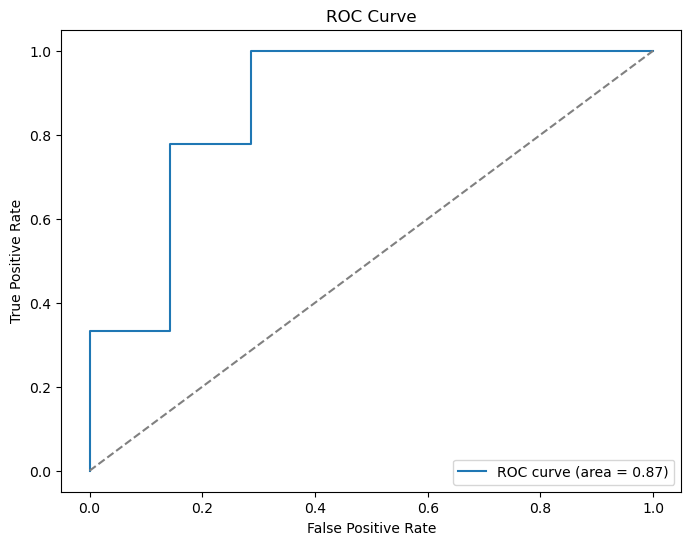

In [518]:
# Step 7: Evaluate the ROC curve and AUC score
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Which states need more VA resources for indivudals 65 and older?**

In [522]:
# After running the model and making predictions, filter for high-need states
high_need_states = combined_data[combined_data['high_need'] == 1]

# Display the high-need states
print("States that need more resources based on logistic regression:")
print(high_need_states[['state', 'avg_aged65', 'total_facilities']])

States that need more resources based on logistic regression:
   state  avg_aged65  total_facilities
6     CT   20.659242                 8
8     DE   22.137975                 3
11    HI   20.114907                 6
12    IA   20.132771                17
16    KS   20.379407                19
19    MA   21.573790                20
21    ME   24.032258                13
26    MT   24.025269                16
28    ND   20.369206                 8
29    NE   21.299611                12
30    NH   22.515000                 7
31    NJ   20.300000                19
32    NM   23.112281                16
33    NV   27.772881                12
39    RI   21.677778                 2
40    SC   20.555940                12
46    VT   21.837209                 6
49    WV   21.976905                14


**Which states probably have more than enough VA resources for individuals 65 and older?**

In [528]:
# Filter for low-need states (where high_need == 0)
low_need_states = combined_data[combined_data['high_need'] == 0]

# Display the low-need states
print("States that need fewer resources based on logistic regression:")
print(low_need_states[['state', 'avg_aged65', 'total_facilities']])

States that need fewer resources based on logistic regression:
   state  avg_aged65  total_facilities
0     AK   13.897842                 5
1     AL   19.159619                18
2     AR   19.172014                17
3     AZ   25.627725                24
4     CA   20.239182                67
5     CO   18.256667                19
7     DC   12.200000                 3
9     FL   24.160952                56
10    GA   16.934308                26
13    ID   19.777578                11
14    IL   18.438347                35
15    IN   17.834718                19
17    KY   18.376243                23
18    LA   16.856612                18
20    MD   17.954365                15
22    MI   20.302162                28
23    MN   19.041898                14
24    MO   18.198986                27
25    MS   17.006634                13
27    NC   21.349738                25
34    NY   19.686828                63
35    OH   18.278817                37
36    OK   19.282129                16
3